#Data Mining Assignment - Text Mining

Student: John Baxter (b23johba)



#Data Exploration and Preparation

##Loading packages and data

In [ ]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

In [ ]:
with open('/content/training.1600000.processed.noemoticon.csv', 'rb') as f:
    result = chardet.detect(f.read())


df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding=result['encoding'])

In [ ]:
backup_start = df

In [ ]:
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7295814519475989, 'language': ''}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [ ]:
df.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
#Set column names
column_names = ["target", "ids", "date", "flag", "user", "text"]
# Assign column names to the DataFrame
df.columns = column_names

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [ ]:
df['target'].value_counts()

4    800000
0    799999
Name: target, dtype: int64

In [ ]:
df['flag'].value_counts()

NO_QUERY    1599999
Name: flag, dtype: int64

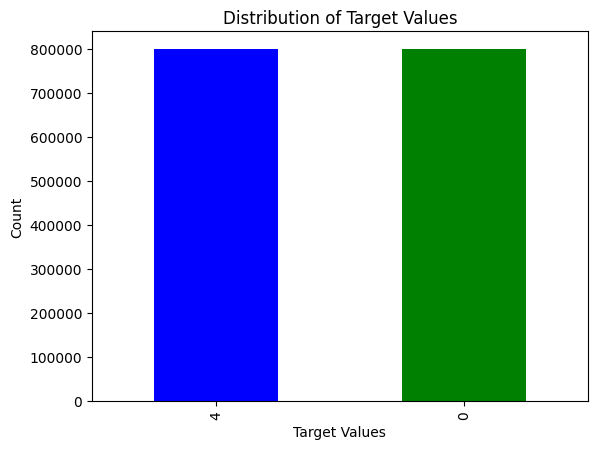

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Target Values')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.show()

In [ ]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
df['target'] = df['target'].replace(4, 1)

**Summary**

Data has no null values

Data is either 4 = positive or 0 = negative. 4s are converted to 1s for easier processing

There is no bias in the data.

#Processing raw text

##Remove puncation

In [ ]:
!pip install unidecode --quiet

In [ ]:
from unidecode import unidecode

In [ ]:
# Function to remove special characters and punctuation
def remove_special_characters(text):
    # Define a string of punctuation characters
    punctuation_chars = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation_chars])

    #Remove other special characters, numbers, and accented characters
    text = ''.join([char for char in unidecode(text) if char.isalnum() or char.isspace()])

    return text

In [ ]:
# Apply the function to remove special characters to the 'text' column
df['text'] = df['text'].apply(remove_special_characters)

##Tokenization

In [ ]:
!pip install nltk --quiet

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenize the 'text' column
df['tokens'] = df['text'].apply(word_tokenize)

# Display the DataFrame with the new 'tokens' column
print(df.head())

   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  \
0  is upset that he cant update his Facebook by t...   
1  Kenichan I dived many times for the ball Manag...   
2    my whole body feels itchy and like its on fire    
3  nationwideclass no its not behaving at all im ...   
4                       Kwesidei not the whole crew    

                                              tokens  
0  [is, upset, that, he, cant, update, his, Faceb...  
1  [Kenichan, I, dived, many, times, for, the, ba...  
2  [my, whole, bo

##Stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Display the DataFrame with the new 'tokens' column after removing stop words
print(df.head())

   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  \
0  is upset that he cant update his Facebook by t...   
1  Kenichan I dived many times for the ball Manag...   
2    my whole body feels itchy and like its on fire    
3  nationwideclass no its not behaving at all im ...   
4                       Kwesidei not the whole crew    

                                              tokens  
0  [upset, cant, update, Facebook, texting, might...  
1  [Kenichan, dived, many, times, ball, Managed, ...  
2            [who

##Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming to each list of tokens
df['tokens'] = df['tokens'].apply(lambda x: [porter_stemmer.stem(word) for word in x])

# Display the DataFrame with the new 'tokens' column after stemming
print(df.head())

   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  \
0  is upset that he cant update his Facebook by t...   
1  Kenichan I dived many times for the ball Manag...   
2    my whole body feels itchy and like its on fire    
3  nationwideclass no its not behaving at all im ...   
4                       Kwesidei not the whole crew    

                                              tokens  
0  [upset, cant, updat, facebook, text, might, cr...  
1  [kenichan, dive, mani, time, ball, manag, save...  
2             [wh

##Visualisation

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Combine all tokens into a single list
all_words = [word for tokens in df['tokens'] for word in tokens]

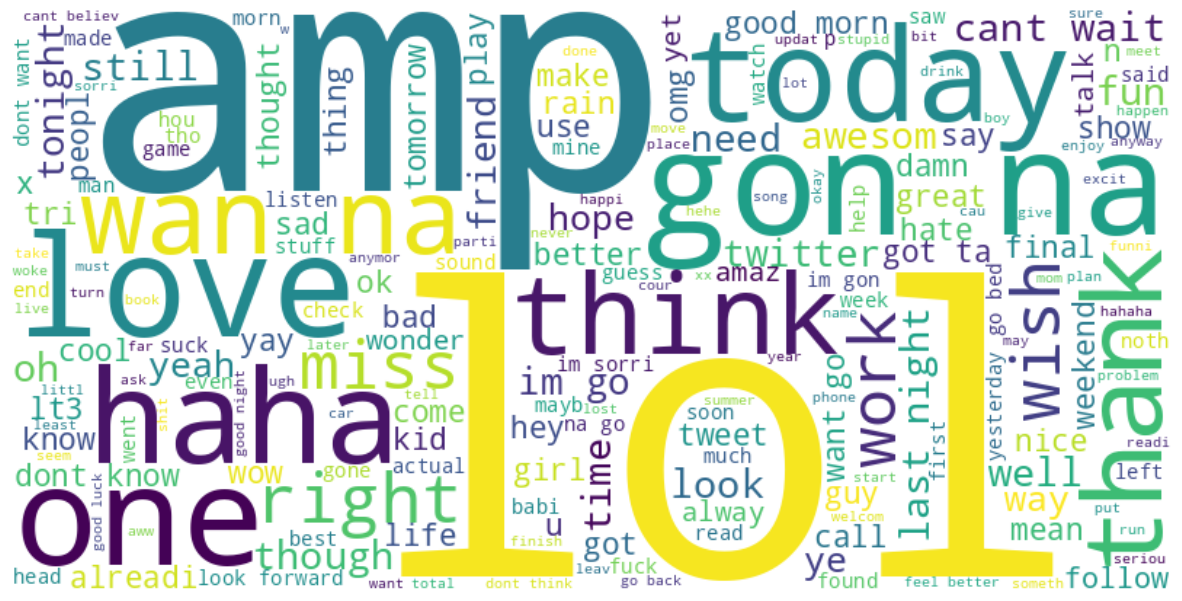

In [ ]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud using Matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

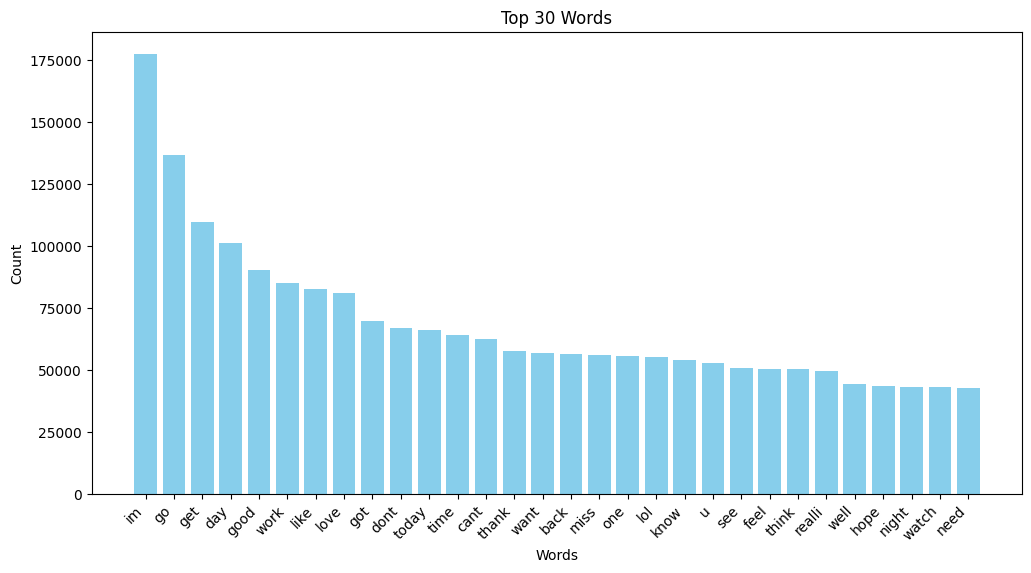

In [ ]:
# Use Counter to count word occurrences
word_counts = Counter(all_words)

# Get the top 30 words and their counts
top_words = word_counts.most_common(30)

# Convert the result to a DataFrame for easy plotting
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Words')
plt.xticks(rotation=45, ha='right')
plt.show()

From first run through, the majority of tokens found were puncation and other unwanted words such as http.

Removal of puncation helped the tokens to make more sense.

There could be some further trimming with removal of words such as im. But further test would be required to say for sure.

#Spliting data

In [ ]:
bow_df = df

In [ ]:
# taking 5% data
sampled_data = bow_df.sample(frac=0.05, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

#split the data
X = sampled_data['tokens']
y = sampled_data['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state = 45)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(56000,)
(56000,)
(24000,)
(24000,)


In [ ]:
X_train

1148613    [rem28, reginagrace18, sibyl714, idea, whoever...
938923                     [mouth, feel, lot, better, peopl]
1261707    [spex, said, quoti, dont, manger, galanerquot,...
1233510    [rolfjason, thank, ton, man, still, partial, s...
1502762    [jj9828, think, saw, 13, one, see, jon, boxer,...
                                 ...                        
306048                      [burnt, arm, littl, cook, today]
827344     [make, pancak, amp, blueberri, mapl, syrup, sc...
784692     [marytina, could, think, shouldnt, 7am, class,...
1561796     [say, life, good, cuz, duh, du, dur, life, good]
348083     [drop, car, shop, todaybrakelin, wenti, want, ...
Name: tokens, Length: 56000, dtype: object

In [ ]:
Y_train

1148613    1
938923     1
1261707    1
1233510    1
1502762    1
          ..
306048     0
827344     1
784692     0
1561796    1
348083     0
Name: target, Length: 56000, dtype: int64

In [ ]:
def get_sentiments(d, _d):
    positive = (d==1).sum()
    negative = (d==0).sum()
    print('Sentiments in {}:\n Positive: {}\n Negative: {}'.format(_d, positive, negative))

In [ ]:
get_sentiments(Y_train, 'Train data')
get_sentiments(Y_test, 'Test data')

Sentiments in Train data:
 Positive: 28067
 Negative: 27933
Sentiments in Test data:
 Positive: 11934
 Negative: 12066


#Building a BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Flatten the list of lists into a list of strings
flattened_X_train = [' '.join(doc) for doc in X_train]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(flattened_X_train)

# Flatten the list of lists into a list of strings
flattened_X_test = [' '.join(doc) for doc in X_test]

# Transform the test data using the same vectorizer
X_test_transformed = vectorizer.transform(flattened_X_test)

# Now, X_train_transformed and X_test_transformed are in the bag-of-words representation

In [ ]:
featureName = vectorizer.get_feature_names_out()
# Now, feature_names contains the list of words in the vocabulary
print(featureName)

['00' '0001t' '0003' ... 'zzzzzzzzzzzz' 'zzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzz']


In [ ]:
vectorizer.vocabulary_

{'rem28': 47307,
 'reginagrace18': 47190,
 'sibyl714': 51047,
 'idea': 27015,
 'whoever': 61090,
 'get': 20466,
 'marri': 35813,
 'first': 18725,
 'tho': 56257,
 'must': 39044,
 'pictur': 43667,
 'slideshow': 51676,
 'mouth': 38445,
 'feel': 18373,
 'lot': 34314,
 'better': 6654,
 'peopl': 43203,
 'spex': 52671,
 'said': 48910,
 'quoti': 45849,
 'dont': 15339,
 'manger': 35475,
 'galanerquot': 20014,
 'awwwww': 5297,
 'lol': 34022,
 'rolfjason': 48232,
 'thank': 55479,
 'ton': 57111,
 'man': 35409,
 'still': 53380,
 'partial': 42737,
 'shock': 50811,
 'jj9828': 29597,
 'think': 56173,
 'saw': 49411,
 '13': 325,
 'one': 41681,
 'see': 49910,
 'jon': 29917,
 'boxer': 7864,
 'cours': 12202,
 'thing': 56153,
 'rememb': 47322,
 'make': 35301,
 'quesadilla': 45452,
 'dinner': 14685,
 'much': 38835,
 'good': 21080,
 'tv': 57999,
 'tonight': 57130,
 'bachelorett': 5501,
 'new': 39907,
 'season': 49845,
 'secret': 49888,
 'life': 33337,
 'amp': 3482,
 'kate': 30835,
 'divorc': 14923,
 'morn': 3

##SVM

In [ ]:
from sklearn.svm import SVC
svmpolynomial = SVC(gamma = 0.1, kernel = 'poly', random_state = 42)
svmpolynomial.fit(X_train_transformed,Y_train)
labels_predict = svmpolynomial.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, labels_predict))
print("Classification Report:\n", classification_report(Y_test, labels_predict))

Accuracy: 0.6965833333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.53      0.64     12066
           1       0.64      0.87      0.74     11934

    accuracy                           0.70     24000
   macro avg       0.72      0.70      0.69     24000
weighted avg       0.72      0.70      0.69     24000



In [ ]:
cm = confusion_matrix(Y_test, labels_predict)
# Calculate metrics
SVM_accuracy = accuracy_score(Y_test, labels_predict)
SVM_precision = precision_score(Y_test, labels_predict)
SVM_recall = recall_score(Y_test, labels_predict)
SVM_f1 = f1_score(Y_test, labels_predict)

# Display confusion matrix and metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)
print("Recall:", SVM_recall)
print("F1 Score:", SVM_f1)

Confusion Matrix:
[[ 6362  5704]
 [ 1578 10356]]
Accuracy: 0.6965833333333333
Precision: 0.6448318804483189
Recall: 0.8677727501256913
F1 Score: 0.7398728298921198


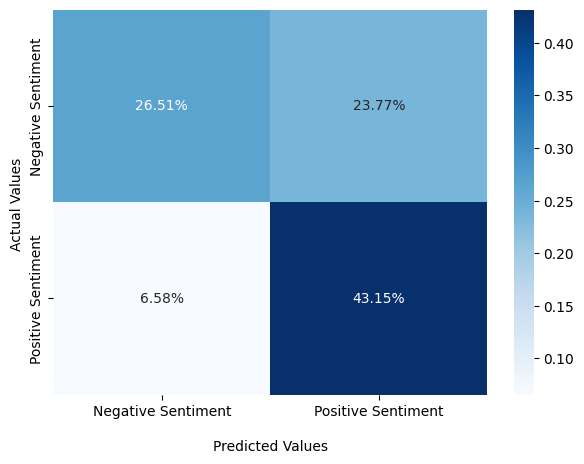

In [ ]:
#Visualise Confusion matrix
cm = confusion_matrix(Y_test, labels_predict)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])
ax.yaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])

plt.show()

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, Y_train)
dt_y_pred = classifier.predict(X_test_transformed)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, dt_y_pred))
print("Classification Report:\n", classification_report(Y_test, dt_y_pred))

Accuracy: 0.695375
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71     12066
           1       0.71      0.66      0.68     11934

    accuracy                           0.70     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.70      0.70      0.70     24000



In [ ]:
cm = confusion_matrix(Y_test, dt_y_pred)
# Calculate metrics
DT_accuracy = accuracy_score(Y_test, dt_y_pred)
DT_precision = precision_score(Y_test, dt_y_pred)
DT_recall = recall_score(Y_test, dt_y_pred)
DT_f1 = f1_score(Y_test, dt_y_pred)

# Display confusion matrix and metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", DT_accuracy)
print("Precision:", DT_precision)
print("Recall:", DT_recall)
print("F1 Score:", DT_f1)

Confusion Matrix:
[[8755 3311]
 [4000 7934]]
Accuracy: 0.695375
Precision: 0.7055580257892397
Recall: 0.664823194234959
F1 Score: 0.6845851848656112


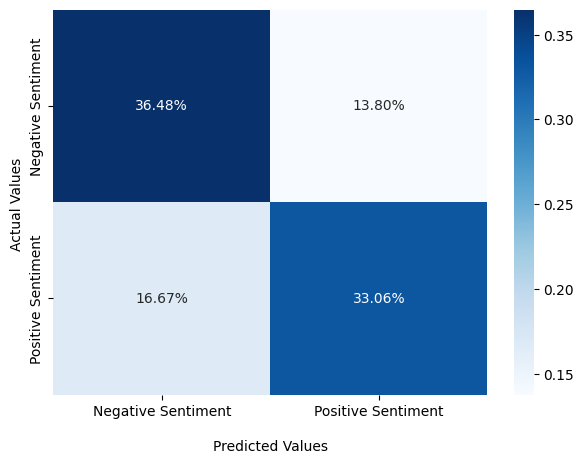

In [ ]:
#Visualise Confusion matrix
cm = confusion_matrix(Y_test, dt_y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])
ax.yaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])

plt.show()

##KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create an instance of the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train_transformed, Y_train)

# Make predictions on the test data
knn_y_pred = knn_classifier.predict(X_test_transformed)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, knn_y_pred))
print("Classification Report:\n", classification_report(Y_test, knn_y_pred))

Accuracy: 0.6465
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67     12066
           1       0.67      0.58      0.62     11934

    accuracy                           0.65     24000
   macro avg       0.65      0.65      0.64     24000
weighted avg       0.65      0.65      0.64     24000



In [ ]:
cm = confusion_matrix(Y_test, knn_y_pred)
# Calculate metrics
knn_accuracy = accuracy_score(Y_test, knn_y_pred)
knn_precision = precision_score(Y_test, knn_y_pred)
knn_recall = recall_score(Y_test, knn_y_pred)
knn_f1 = f1_score(Y_test, knn_y_pred)

# Display confusion matrix and metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

Confusion Matrix:
[[8610 3456]
 [5028 6906]]
Accuracy: 0.6465
Precision: 0.6664736537348003
Recall: 0.5786827551533434
F1 Score: 0.6194833153928957


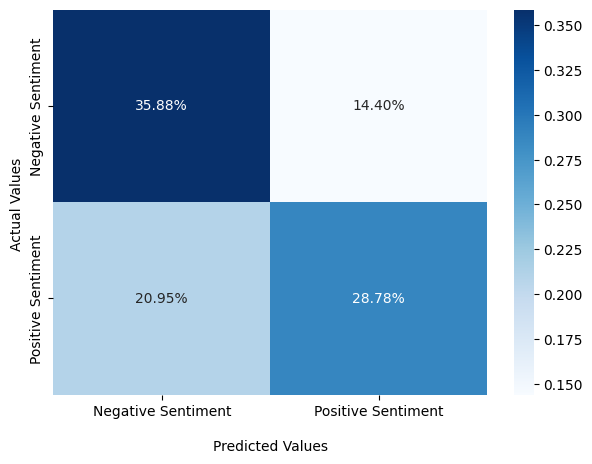

In [ ]:
#Visualise Confusion matrix
cm = confusion_matrix(Y_test, knn_y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])
ax.yaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])

plt.show()

#Use Word Embeddings (Word2Vec)

In [ ]:
# taking 5% data
sampled_data = df.sample(frac=0.05, random_state=42)

In [ ]:
w2v_df = sampled_data

In [94]:
w2v_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 541200 to 1317208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  80000 non-null  int64 
 1   ids     80000 non-null  int64 
 2   date    80000 non-null  object
 3   flag    80000 non-null  object
 4   user    80000 non-null  object
 5   text    80000 non-null  object
 6   tokens  80000 non-null  object
 7   vec     80000 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.5+ MB


In [ ]:
!pip install spacy --quiet
!python -m spacy download en_core_web_lg

2023-12-31 13:05:10.454655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 13:05:10.454701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 13:05:10.456008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 13:05:10.463290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 13:05:11.549227: W tensorflow/compiler/tf2

In [ ]:
#import spacy library, load and initiate the english language model
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

In [ ]:
# create function to create a spaCy doc object, creating a vector representation
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [ ]:
#creates vectors from tokens and flattens lists into strings
w2v_df['vec'] = w2v_df['tokens'].apply(lambda x: get_vec(" ".join(x)))

In [101]:
#Extract the 'vec' column from the DataFrame and convert it to a NumPy array
X = w2v_df['vec'].to_numpy()

# 2D array size/shape
size_of_X = X.size
shape_of_X = X.shape

print("Size of X (number of elements):", size_of_X)
print("Shape of X (dimensions):", shape_of_X)

Size of X (number of elements): 80000
Shape of X (dimensions): (80000,)


In [102]:
#Reshape the array into a column vector
X = X.reshape(-1, 1)

#Flatten the array
X = np.concatenate(np.concatenate(X, axis=0), axis=None)

#Reshape the flattened array into a 2D array with X columns
X = X.reshape(80000,-1)

#Extract the 'target' column as labels
Y = w2v_df['target']

#Print the shapes of the resulting arrays
print(X.shape, Y.shape)

(80000, 300) (80000,)


In [103]:
#Split data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42, stratify = Y)

In [104]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(56000, 300)
(56000,)
(24000, 300)
(24000,)


In [105]:
get_sentiments(Y_train, 'Train data')
get_sentiments(Y_test, 'Test data')

Sentiments in Train data:
 Positive: 28001
 Negative: 27999
Sentiments in Test data:
 Positive: 12000
 Negative: 12000


#CNN

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout, Embedding

In [109]:
# Pad the sequence to the same length if required (tweets can only be 280 charcters long)
max_text_length = 280
X_train = sequence.pad_sequences(X_train, maxlen=max_text_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_text_length)

In [110]:
# Using embedding from Keras
embedding_vecor_length = 300

# Create a Sequential model
model = Sequential()

# Embedding Layer: Converts text data into dense vectors
model.add(Embedding(input_dim=10000, output_dim=embedding_vecor_length, input_length=max_text_length))

# Convolutional model (3x conv, flatten, 2x dense)
# Convolutional Layer 1: 64 filters, kernel size 3, padding to maintain input length
model.add(Convolution1D(64, 3, padding='same'))
# Convolutional Layer 2: 32 filters, kernel size 3, padding to maintain input length
model.add(Convolution1D(32, 3, padding='same'))
# Convolutional Layer 3: 16 filters, kernel size 3, padding to maintain input length
model.add(Convolution1D(16, 3, padding='same'))

# Flatten Layer: Converts the 3D output to 1D array for dense layers
model.add(Flatten())

# Dropout Layer 1: Helps prevent overfitting by randomly setting a fraction of input units to 0 during training
model.add(Dropout(0.2))

# Dense Layer 1: Fully connected layer with 180 neurons and sigmoid activation
model.add(Dense(180, activation='sigmoid'))

# Dropout Layer 2: Helps prevent overfitting
model.add(Dropout(0.2))

# Dense Layer 2: Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
model.fit(X_train, Y_train, epochs=3, batch_size=64)

Epoch 1/3
875/875 [==============================] - 27s 31ms/step - loss: 0.5722 - accuracy: 0.6965
Epoch 2/3
875/875 [==============================] - 27s 31ms/step - loss: 0.5918 - accuracy: 0.6795
Epoch 3/3
875/875 [==============================] - 27s 30ms/step - loss: 0.5925 - accuracy: 0.6799


In [125]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 67.08%


In [132]:
# Predictions on test set
y_pred_prob = model.predict(X_test)
cnn_y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get binary predictions

# Calculate and record metrics
CNN_accuracy = accuracy_score(Y_test, cnn_y_pred)
CNN_precision = precision_score(Y_test, cnn_y_pred)
CNN_recall = recall_score(Y_test, cnn_y_pred)
CNN_f1 = f1_score(Y_test, cnn_y_pred)

# Print the metrics
print("Accuracy:", CNN_accuracy)
print("Precision:", CNN_precision)
print("Recall:", CNN_recall)
print("F1 Score:", CNN_f1)

750/750 [==============================] - 4s 5ms/step
Accuracy: 0.6707916666666667
Precision: 0.6386577362830661
Recall: 0.7866666666666666
F1 Score: 0.7049774093573802


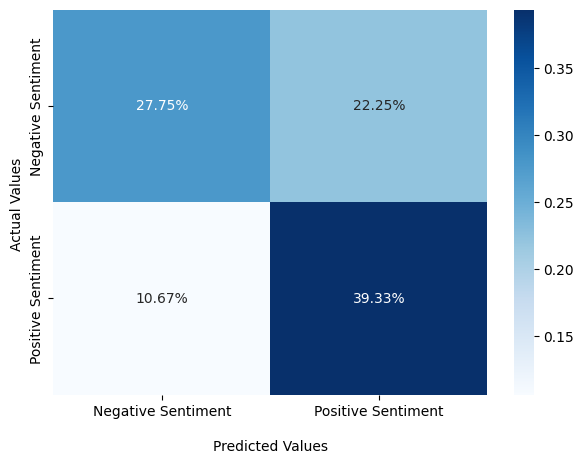

In [135]:
#Visualise Confusion matrix
cm = confusion_matrix(Y_test, cnn_y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])
ax.yaxis.set_ticklabels(['Negative Sentiment','Positive Sentiment'])

plt.show()

#Comparision Summary

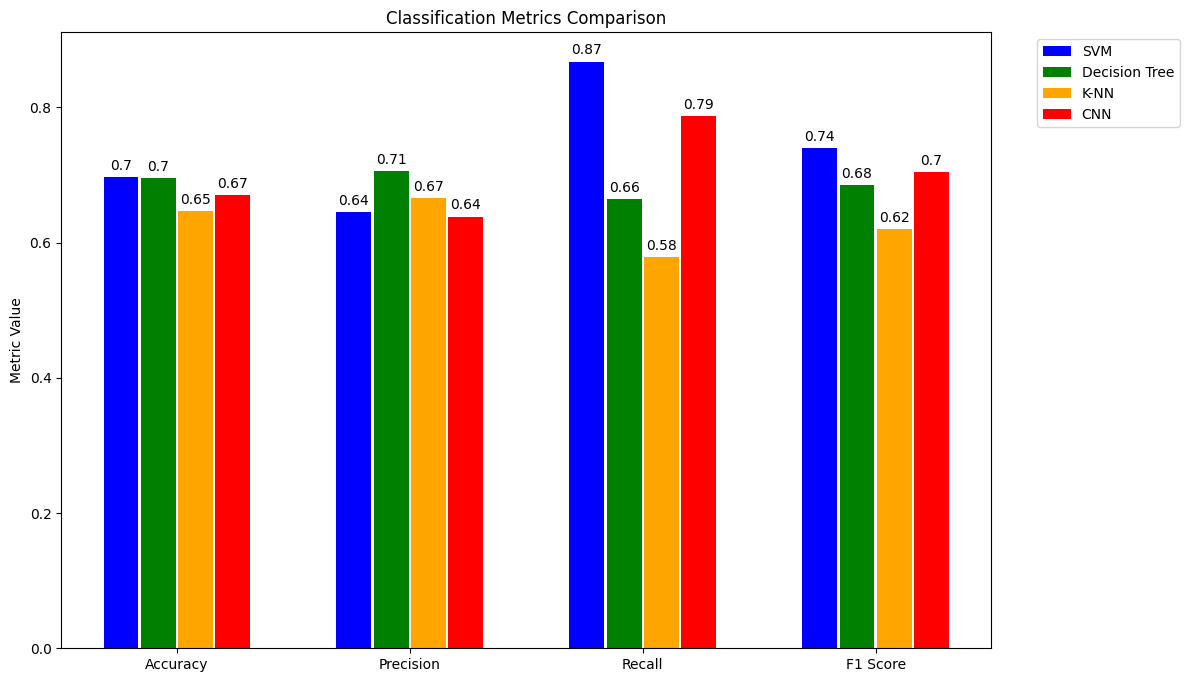

In [134]:
# Define the classification methods and their respective metrics
methods = ['SVM', 'Decision Tree', 'K-NN', "CNN"]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['blue', 'green', 'orange', 'red']

# Corresponding metric values for each method
metric_values = [
    [SVM_accuracy, DT_accuracy, knn_accuracy, CNN_accuracy],
    [SVM_precision, DT_precision, knn_precision, CNN_precision],
    [SVM_recall, DT_recall, knn_recall, CNN_recall],
    [SVM_f1, DT_f1, knn_f1, CNN_f1]
]

# Set up the positions for the bar groups with added spacing
ind = np.arange(len(metrics))
width = 0.15  # Width of the bars
spacing = 0.01  # Spacing between metrics

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plots for each model
for i, method in enumerate(methods):
    bars = ax.bar(ind + i * (width + spacing), [metric[i] for metric in metric_values], width, label=method, color=colors[i])

# Labels, title, and legend to the right
ax.set_xticks(ind + (len(methods) - 1) * (width + spacing) / 2)  # Centering the x-axis ticks
ax.set_xticklabels(metrics)
ax.set_ylabel('Metric Value')
ax.set_title('Classification Metrics Comparison')

# Move legend to the right, on the top side
ax.legend(loc='upper right', bbox_to_anchor=(1.21, 1))

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Autolabel for each group of bars
for i in range(len(methods)):
    autolabel(ax.patches[i * len(metrics): (i + 1) * len(metrics)])

plt.show()

**Summary**

From the comparision it is possible to see that the methods have similar results with the SVM and CNN proving slightly better.

It should be noted that the data is only 5% of the original to speed up the analysis steps. 100% was tried but it took a very long time to process! Even with 5%, there was 56,000 texts analysed.